In [1]:
import numpy as np
import matplotlib.pyplot as plt
final_fig_path = "../../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, '../Functions')
from scipy.optimize import root
from scipy.integrate import solve_ivp
#from fitness_funs_non_dim import *
from group_w_pop_funs import get_list_of_trajectories
import equilibria_funs as eq
import sim_graph_funs as sim
from sim_graph_funs import plot_trajectory_vs_T
#from sim_graph_funs import N1lab, N2lab, Plab, mean_x_lab, Tlab
import bif_diagram_funs as bif
from local_stability_funs import fun_Jac, classify_stability
colors_x = ['k', 'b', 'r', 'm']
bif_sim_fig_path = final_fig_path + "BifurcationSimulations/"


# Simulate from Bifurcation Diagrams

Simulates the system for different regions from the bifurcation graphs

In [39]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

In [40]:
fn_lab_list = ['meanx', 'preys', 'g2', 'g3']

# Type 1

In [1]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)
params = params_base.copy()

In [2]:
start_inds = [[50,50,50,50],#50,
              [50,50,50,50],#50,
              [10,3,10,30],#10,
              [10,2,10,15]] #10,

In [ ]:
params['β1'] = 9
fig1 = plot_trajectory_vs_T

generating initial points


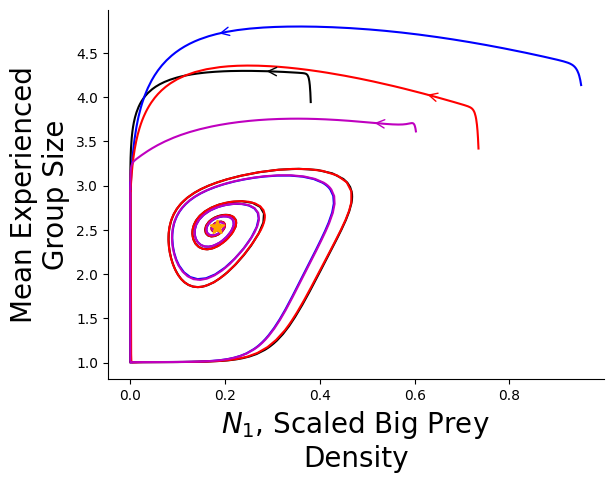

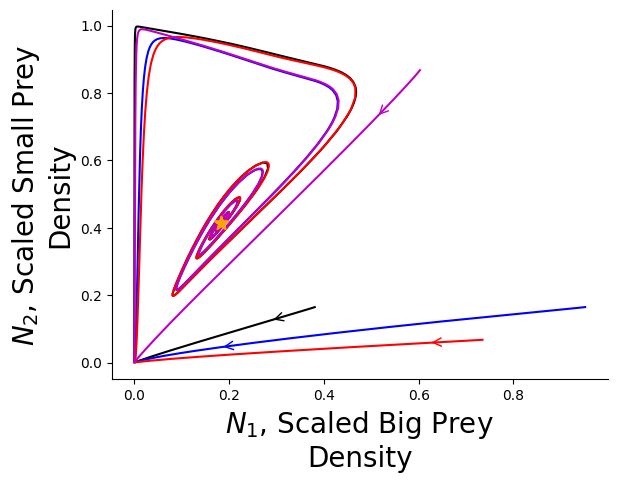

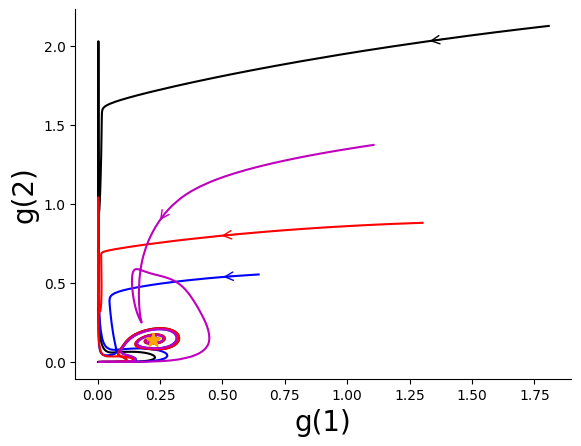

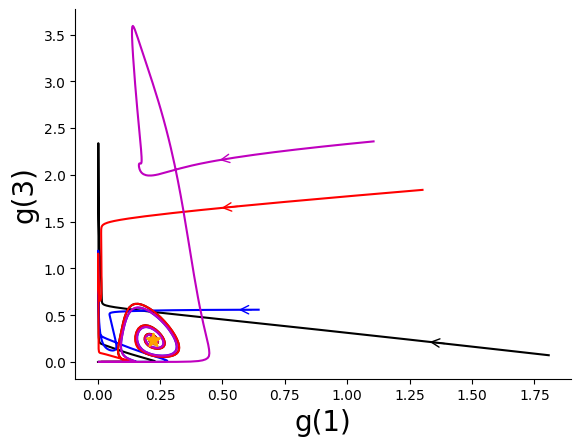

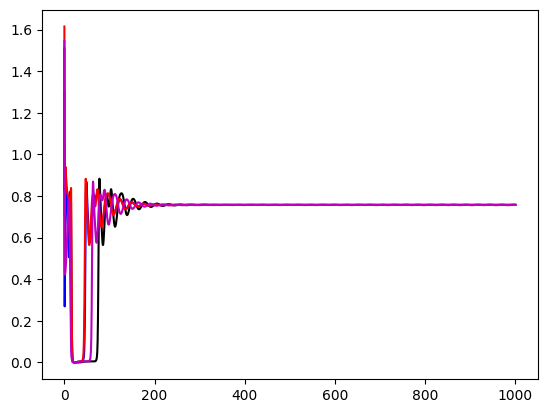

In [6]:

fig1, figN, fig_g2, fig_g3, fig_var = sim.make_traj_plots(
    params, t_f =1000, start_inds = start_inds, grp_size2 = 3, num_init = 4)

In [9]:
trajs = sim.get_traj_plot_input(params, t_f = 1000, initial_points = None, 
                        num_init=4)

generating initial points


In [31]:
from sim_graph_funs import plot_with_arrow, format_ax, colors_x

In [9]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = '_type1_b1_9.eps'
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [12]:
sim.colors_x

['k', 'b', 'r', 'm']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


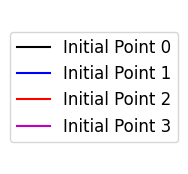

In [2]:
lines = []
for i in range(0,4):
    lines.append(plt.Line2D([0], [0], 
                            color=sim.colors_x[i], 
                            label='Initial Point %d'%i))

# Create a blank figure for the legend
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust size as needed
ax.legend(handles=lines, loc='center', fontsize=12)
ax.axis('off')  
fig.savefig(bif_sim_fig_path + "legend_only.eps", **sim.figure_ops)

# Type II, Prey Growth = 0.4

In [6]:
H = 2
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)


In [7]:
params = bif.update_params('η1',0.4,params_base)
initial_points = bif.get_initial_points(3,**params)
initialstate = [.3,.7,*eq.initiate_g_first_x(3,params["x_max"])]
initial_points = np.vstack((initial_points,initialstate))

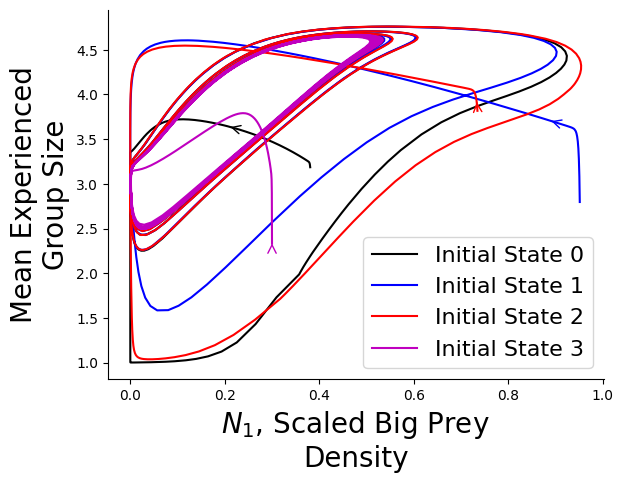

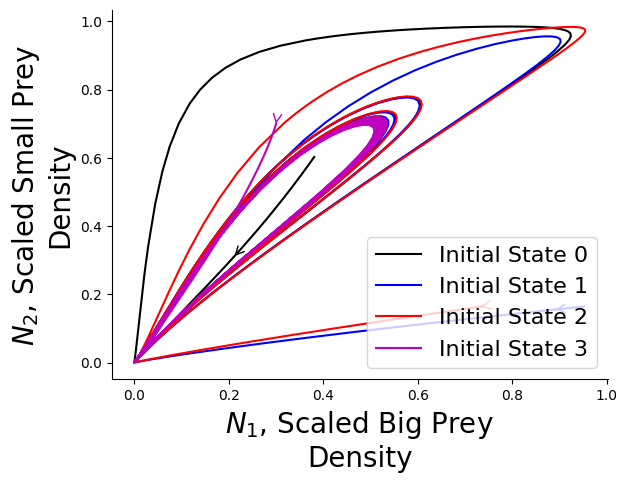

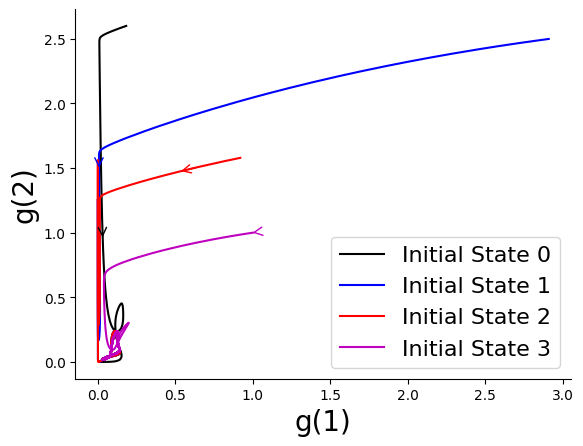

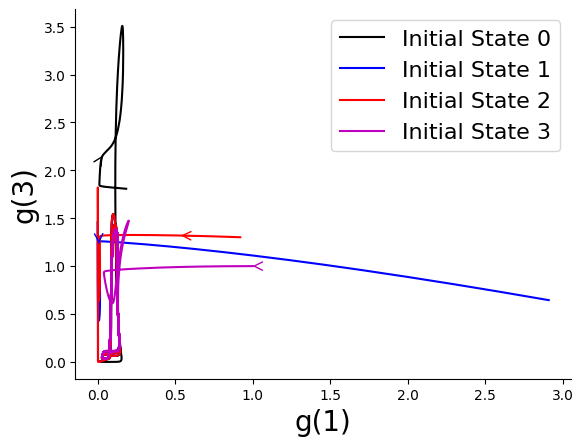

In [8]:
fig1, figN, fig_g2, fig_g3 = make_traj_plots(
    params, t_f =1000, start_inds = [50,50,5,5], grp_size2 = 3,
initial_points = initial_points
)

In [ ]:
trajs = get_traj_plot_input(params, t_f = 1000, initial_points = initial_points)


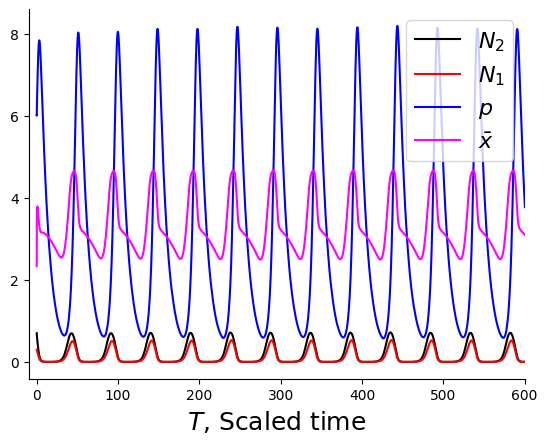

In [21]:
curr_traj = trajs[3] #T, N1, N2, p, g_of_x_vec, mean_x
T, N1, N2, p, g_of_x_vec, mean_x = curr_traj
fig_all, ax = sim.plot_all(T,N1,N2,p,mean_x, xlim = [-10, 600])

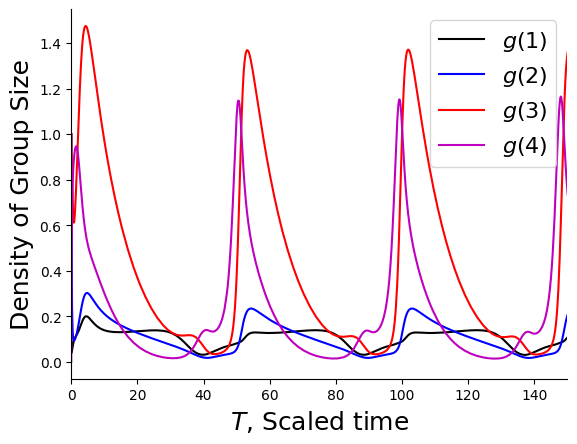

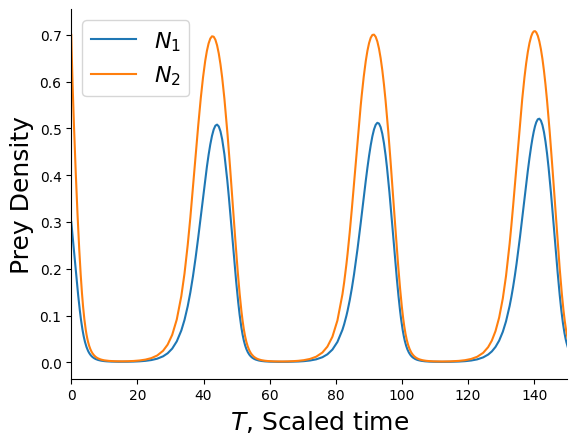

In [35]:
fig_g, ax_g = plt.subplots(1,1)
for i in [1,2,3,4]:
    ax_g.plot(T,g_of_x_vec[i-1], label = r'$g($'+str(i) +r'$)$', c = colors_x[i-1])


xlim = [0,150]
sim.format_ax(ax_g, xlab = sim.Tlab,ylab = "Density of Group Size",if_legend = True,
         xlim = xlim,fs_labs = 18)

fig_NT, ax_NT = plt.subplots(1,1)
ax_NT.plot(T,N1, label = r'$N_1$')
ax_NT.plot(T,N2, label = r'$N_2$')

sim.format_ax(ax_NT, xlab = sim.Tlab,ylab = "Prey Density",if_legend = True,
         xlim = xlim,fs_labs = 18)

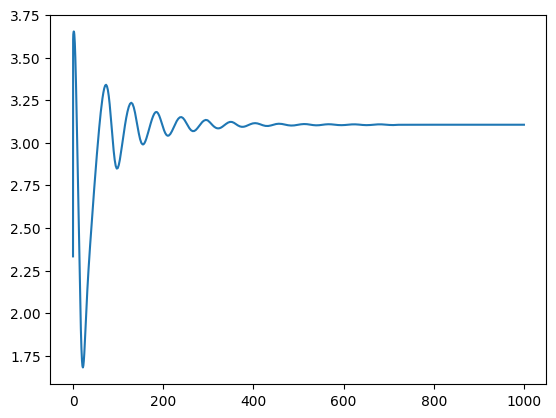

In [49]:
T, N1, N2, P, g_of_x_vec, mean_x = trajectories[3]
plt.plot(T,mean_x)

# 

In [50]:
traj4 = [N1,N2,*g_of_x_vec]
curr = [item[-1] for item in traj4]
success, _ = eq.check_at_equilibrium2(curr[0], curr[1], curr[2:], params)

In [51]:
success

True

In [52]:
[N1,N2,*gvec] = curr
jac = fun_Jac(N1,N2,gvec,**params)

In [53]:
curr

[np.float64(0.4262356771304499),
 np.float64(0.6435044838377991),
 np.float64(0.2098032201407924),
 np.float64(0.1722060337655335),
 np.float64(0.30961985804648895),
 np.float64(0.17497659643068772),
 np.float64(0.031166667963969406)]

In [54]:
classify_stability(jac)

'Unstable'

In [25]:
perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]

In [26]:
initialstate = np.array(perturbed_pt)
t_f = 20

In [27]:
equilibrium, success, timederivatives = eq.iterate_to_eq(np.array(perturbed_pt), t_f, params)

In [28]:
equilibrium

[np.float64(0.1474796972510038),
 np.float64(0.49650092779427757),
 np.float64(0.3153575814940707),
 np.float64(0.0817495999266995),
 np.float64(0.03923489785506633),
 np.float64(0.0031630986570799),
 np.float64(5.059227953694135e-05)]

In [29]:
success

False

In [17]:
    out2 = grp.bounded_ivp(initialstate, params, t_f = t_f) 
    T, N1, N2, P, g_of_x_vec, mean_x = out2
    
    # extract results
    traj = [N1,N2,*g_of_x_vec]
    curr = [item[-1] for item in traj]

    # check if at equilibrium
    success, timederivatives = eq.check_at_equilibrium2(curr[0], curr[1], curr[2:], params)
    
    
   # return curr, success, timederivatives 

NameError: name 'initialstate' is not defined

In [39]:
timederivatives

[np.float64(2.0249893983859124e-09),
 np.float64(6.560376825115455e-10),
 np.float64(-3.175634614212969e-10),
 np.float64(1.0147945851690654e-10),
 np.float64(7.97837533886292e-10),
 np.float64(1.2731445021493815e-09),
 np.float64(4.4749568633983827e-10)]

In [26]:
eq.iterate_to_eq(perturbed_pt, 1000, params)

(array([2.33905285, 0.42622372, 0.64348215, 0.20980134, 0.17221326,
        0.3096513 , 0.17500247, 0.03117224]),
 np.False_,
 np.float64(3.105898878180319),
 [np.float64(-5.204461245321423e-06),
  np.float64(-2.7693252625943243e-06),
  np.float64(2.0770497340832396e-06),
  np.float64(5.535185374069482e-07),
  np.float64(-3.696655444100118e-07),
  np.float64(-3.372568364791613e-06),
  np.float64(8.328040212741278e-07)],
 [array([0.00000000e+00, 3.63342566e-07, 7.26685131e-07, 6.52342268e-05,
         1.29741769e-04, 1.94249310e-04, 3.76825294e-04, 5.59401278e-04,
         7.41977263e-04, 9.24553247e-04, 1.27739849e-03, 1.63024373e-03,
         1.98308897e-03, 2.33593421e-03, 2.68877945e-03, 3.40613262e-03,
         4.12348579e-03, 4.84083895e-03, 5.55819212e-03, 6.27554529e-03,
         7.63694937e-03, 8.99835346e-03, 1.03597576e-02, 1.17211616e-02,
         1.30825657e-02, 1.50015221e-02, 1.69204785e-02, 1.88394350e-02,
         2.07583914e-02, 2.26773478e-02, 2.51604349e-02, 2.764352

In [14]:
curr

[np.float64(0.4262356771304499),
 np.float64(0.6435044838377991),
 np.float64(0.2098032201407924),
 np.float64(0.1722060337655335),
 np.float64(0.30961985804648895),
 np.float64(0.17497659643068772),
 np.float64(0.031166667963969406)]